<a href="https://colab.research.google.com/github/BaghasWahyu/Cryptocurrency-Predicition-App/blob/main/Crypto_price_prediction_using_lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
# from google.colab import drive
# drive.flush_and_unmount()

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup

In [5]:
crypto_name_list = []
crypto_market_cap_list = []
crypto_price_list = []
crypto_circulating_supply_list = []
crypro_symbol_list = []

In [6]:
df = pd.DataFrame()

In [7]:
def scrape(date):
  URL = 'https://coinmarketcap.com/historical/'+date
  webpage = requests.get(URL)
  soup = BeautifulSoup(webpage.text, 'html.parser')
  tr = soup.find_all('tr', attrs={'class':'cmc-table-row'})
  count = 0
  for row in tr:
    if count == 10:
      break;
    count = count + 1
    name_column = row.find('td', attrs={'class': 'cmc-table__cell cmc-table__cell--sticky cmc-table__cell--sortable cmc-table__cell--left cmc-table__cell--sort-by__name'})
    crypto_name = name_column.find('a', attrs={'class':'cmc-table__column-name--name cmc-link'}).text.strip()
    coin_market_cap = row.find('td', attrs={'class':'cmc-table__cell cmc-table__cell--sortable cmc-table__cell--right cmc-table__cell--sort-by__market-cap'}).text.strip()
    crypto_price = row.find('td', attrs={'class':'cmc-table__cell cmc-table__cell--sortable cmc-table__cell--right cmc-table__cell--sort-by__price'}).text.strip()
    crypto_circulating_supply_symbol = row.find('td', attrs={'class':'cmc-table__cell cmc-table__cell--sortable cmc-table__cell--right cmc-table__cell--sort-by__circulating-supply'}).text.strip()
    crypto_circulating_supply = crypto_circulating_supply_symbol.split(' ')[0]
    crypto_symbol = crypto_circulating_supply_symbol.split(' ')[1]

    crypto_name_list.append(crypto_name)
    crypto_market_cap_list.append(coin_market_cap)
    crypto_price_list.append(crypto_price)
    crypto_circulating_supply_list.append(crypto_circulating_supply)
    crypro_symbol_list.append(crypto_symbol)

In [8]:
from datetime import datetime

tanggal = '2022-12-31' #@param {type:"date"}
tanggal = tanggal.replace("-","")


In [9]:
print(tanggal)

20221231


In [10]:
scrape(date = f'{tanggal}/')

In [11]:
df['Name'] =  crypto_name_list
df['Market Capitalization'] = crypto_market_cap_list
df['Price'] = crypto_price_list
df['Circulating Supply'] = crypto_circulating_supply_list
df['Symbol'] = crypro_symbol_list

In [12]:
df

,Name,Market Capitalization,Price,Circulating Supply,Symbol
0,Bitcoin,"$318,516,317,872.24","$16,547.50","19,248,612",BTC
1,Ethereum,"$146,453,523,490.14","$1,196.77","122,373,866",ETH
2,Tether,"$66,242,103,757.59",$0.9997,"66,263,713,431",USDT
3,USD Coin,"$44,540,806,740.10",$1.0000,"44,539,532,929",USDC
4,BNB,"$39,407,173,515.71",$246.35,"159,964,697",BNB
5,XRP,"$17,113,207,466.28",$0.3399,"50,343,500,506",XRP
6,Binance USD,"$16,695,767,093.61",$1.0002,"16,692,004,510",BUSD
7,Dogecoin,"$9,325,956,852.39",$0.07029,"132,670,764,300",DOGE
8,Cardano,"$8,505,385,897.18",$0.2465,"34,509,377,667",ADA
9,Polygon,"$6,625,126,687.82",$0.7585,"8,734,317,475",MATIC


In [13]:
list_crypto = df[:5]

In [14]:
list_crypto

,Name,Market Capitalization,Price,Circulating Supply,Symbol
0,Bitcoin,"$318,516,317,872.24","$16,547.50","19,248,612",BTC
1,Ethereum,"$146,453,523,490.14","$1,196.77","122,373,866",ETH
2,Tether,"$66,242,103,757.59",$0.9997,"66,263,713,431",USDT
3,USD Coin,"$44,540,806,740.10",$1.0000,"44,539,532,929",USDC
4,BNB,"$39,407,173,515.71",$246.35,"159,964,697",BNB


In [15]:
nama_crypto = list_crypto['Name']
symbol_crypto = list_crypto['Symbol']

In [16]:
nama_crypto

0     Bitcoin
1    Ethereum
2      Tether
3    USD Coin
4         BNB
Name: Name, dtype: object

In [17]:
symbol_crypto

0     BTC
1     ETH
2    USDT
3    USDC
4     BNB
Name: Symbol, dtype: object

In [18]:
print(type(symbol_crypto))

<class 'pandas.core.series.Series'>


In [19]:
symbolCrypto = []

for i in symbol_crypto:
  symbolCrypto.append(i)

In [20]:
symbolCrypto

['BTC', 'ETH', 'USDT', 'USDC', 'BNB']

In [21]:
!pip install cryptocmd

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 1.1 MB/s eta 0:00:00


In [22]:
from datetime import datetime

startdate = "2019-01-01" #@param {type:"date"}
startdate = datetime.strptime(startdate, '%Y-%m-%d').date()
startdate = startdate.strftime("%d-%m-%Y")

enddate = "2022-12-31" #@param {type:"date"}
enddate = datetime.strptime(enddate, '%Y-%m-%d').date()
enddate = enddate.strftime("%d-%m-%Y")

In [23]:
import ipywidgets as widgets

crypto = widgets.Dropdown(options =symbolCrypto)
output = widgets.Output()
def select(change):
  output.clear_output()
  if(change.new == symbolCrypto[0]):
    with output:
      display(symbolCrypto[0])
  elif(change.new == symbolCrypto[1]):
    with output:
      display(symbolCrypto[1])
  elif(change.new == symbolCrypto[2]):
    with output:
      display(symbolCrypto[2])
  elif(change.new == symbolCrypto[3]):
    with output:
      display(symbolCrypto[3])
  elif(change.new == symbolCrypto[4]):
    with output:
      display(symbolCrypto[4])
  else:
    with output:
      display("Error: option not found")

crypto.observe(select, names="value")
display(crypto)
display(output)

Dropdown(options=('BTC', 'ETH', 'USDT', 'USDC', 'BNB'), value='BTC')

Output()

In [24]:
crypto = crypto.value

In [25]:
from cryptocmd import CmcScraper

scraper = CmcScraper(crypto, startdate, enddate)
df = scraper.get_dataframe()

In [26]:
df.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,2022-12-31,1199.360110,1205.088661,1194.203758,1196.771239,3.018513e+09,1.464535e+11
1,2022-12-30,1201.569638,1202.034669,1187.462543,1199.232754,4.055668e+09,1.467547e+11
2,2022-12-29,1190.010173,1204.141581,1188.360288,1201.595339,4.132234e+09,1.470439e+11
3,2022-12-28,1212.736604,1213.128931,1185.702209,1189.986060,4.991670e+09,1.456232e+11
4,2022-12-27,1226.987102,1230.418031,1205.895588,1212.791638,4.091531e+09,1.484140e+11


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        1461 non-null   datetime64[ns]
 1   Open        1461 non-null   float64       
 2   High        1461 non-null   float64       
 3   Low         1461 non-null   float64       
 4   Close       1461 non-null   float64       
 5   Volume      1461 non-null   float64       
 6   Market Cap  1461 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 80.0 KB


In [28]:
df['Open'] = df['Open'].apply(lambda x:round(x,2))
df['High'] = df['High'].apply(lambda x:round(x,2))
df['Low'] = df['Low'].apply(lambda x:round(x,2))
df['Close'] = df['Close'].apply(lambda x:round(x,2))
df['Volume'] = df['Volume'].apply(lambda x:round(x,0))
df['Market Cap'] = df['Market Cap'].apply(lambda x:round(x,0))

In [29]:
df = df[::-1]
df = df.reset_index()

In [30]:
df = df.drop(columns=['index'])

In [31]:
df

,Date,Open,High,Low,Close,Volume,Market Cap
0,2019-01-01,133.42,141.40,132.65,140.82,2.258710e+09,1.466532e+10
1,2019-01-02,141.52,156.93,140.65,155.05,3.328240e+09,1.615005e+10
2,2019-01-03,155.20,155.86,147.20,149.14,2.676165e+09,1.553685e+10
3,2019-01-04,148.91,156.88,147.91,154.58,3.126193e+09,1.610707e+10
4,2019-01-05,154.34,160.82,154.34,155.64,3.338212e+09,1.621997e+10
...,...,...,...,...,...,...,...
1456,2022-12-27,1226.99,1230.42,1205.90,1212.79,4.091531e+09,1.484140e+11
1457,2022-12-28,1212.74,1213.13,1185.70,1189.99,4.991670e+09,1.456232e+11
1458,2022-12-29,1190.01,1204.14,1188.36,1201.60,4.132234e+09,1.470439e+11
1459,2022-12-30,1201.57,1202.03,1187.46,1199.23,4.055668e+09,1.467547e+11


In [32]:
df.to_excel(f"{crypto}_data_historis.xlsx")

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        1461 non-null   datetime64[ns]
 1   Open        1461 non-null   float64       
 2   High        1461 non-null   float64       
 3   Low         1461 non-null   float64       
 4   Close       1461 non-null   float64       
 5   Volume      1461 non-null   float64       
 6   Market Cap  1461 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 80.0 KB


In [34]:
#Mengubah kolom Date menjadi index
df = df[['Date','Open','High','Low','Close']] # Extracting required columns
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', drop=True, inplace=True) # Setting date column as index
df

,Open,High,Low,Close
Date,,,,
2019-01-01,133.42,141.40,132.65,140.82
2019-01-02,141.52,156.93,140.65,155.05
2019-01-03,155.20,155.86,147.20,149.14
2019-01-04,148.91,156.88,147.91,154.58
2019-01-05,154.34,160.82,154.34,155.64
...,...,...,...,...
2022-12-27,1226.99,1230.42,1205.90,1212.79
2022-12-28,1212.74,1213.13,1185.70,1189.99
2022-12-29,1190.01,1204.14,1188.36,1201.60


In [35]:
crypto_data = df

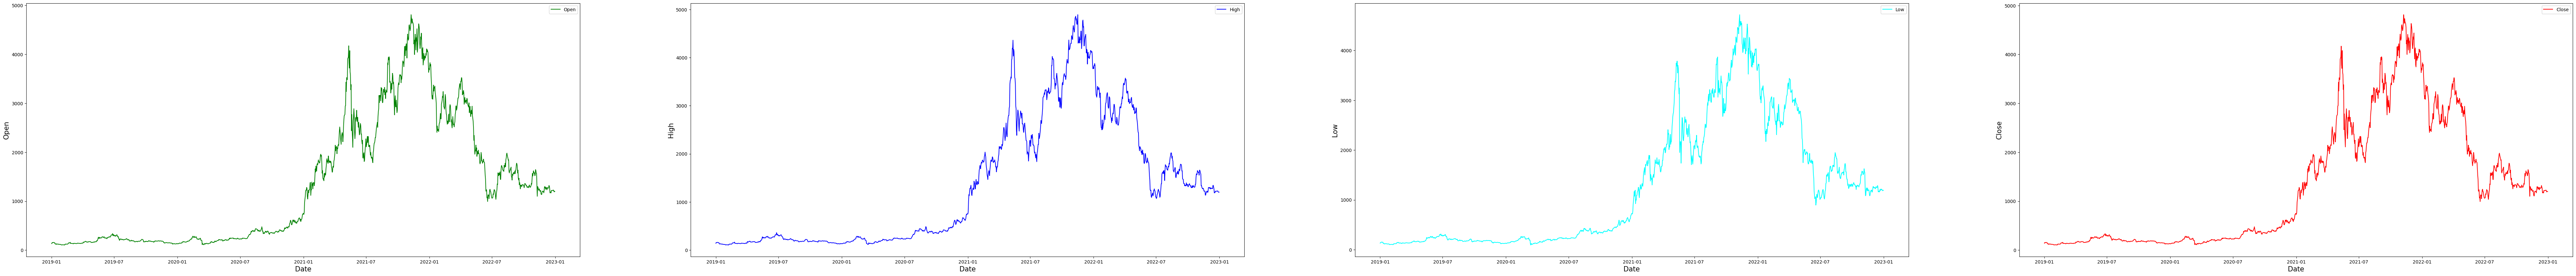

In [36]:
fig, ax = plt.subplots(1,4,figsize=(100,10))

ax[0].plot(crypto_data['Open'], label='Open', color='green')
ax[0].set_xlabel('Date',size=15)
ax[0].set_ylabel('Open',size=15)
ax[0].legend()

ax[1].plot(crypto_data['High'], label='High', color='blue')
ax[1].set_xlabel('Date',size=15)
ax[1].set_ylabel('High',size=15)
ax[1].legend()

ax[2].plot(crypto_data['Low'], label='Low', color='cyan')
ax[2].set_xlabel('Date',size=15)
ax[2].set_ylabel('Low',size=15)
ax[2].legend()

ax[3].plot(crypto_data['Close'], label='Close' ,color='red')
ax[3].set_xlabel('Date',size=15)
ax[3].set_ylabel('Close',size=15)
ax[3].legend()

fig.show()

# Data Pre-Processing

In [37]:
from sklearn.preprocessing import MinMaxScaler
MMS = MinMaxScaler(feature_range=(0, 1))
crypto_data[crypto_data.columns] = MMS.fit_transform(crypto_data)

In [38]:
crypto_data.shape

(1461, 4)

In [40]:
#Pembagian data training dan data testing sebesar 90% dan 10% masing-masing
training_size = round(len(crypto_data) * 0.90)
training_size

1315

In [41]:
train_data = crypto_data[:training_size]
test_data  = crypto_data[training_size:]

train_data.shape, test_data.shape

((1315, 4), (146, 4))

In [278]:
test_data

,Open,High,Low,Close
Date,,,,
2022-08-08,0.338979,0.355403,0.346588,0.354957
2022-08-09,0.355212,0.351063,0.341925,0.339559
2022-08-10,0.339664,0.368465,0.339597,0.371148
2022-08-11,0.371312,0.380697,0.379992,0.377411
2022-08-12,0.377490,0.386885,0.381777,0.393561
...,...,...,...,...
2022-12-27,0.238521,0.234945,0.240267,0.235420
2022-12-28,0.235492,0.231332,0.235897,0.230576
2022-12-29,0.230662,0.229453,0.236473,0.233043


In [42]:
# Fungsi untuk membuat rangkaian data untuk training dan testing
def create_sequence(dataset):
  sequences = []
  labels = []

  start_idx = 0

  for stop_idx in range(10, len(dataset)): # memilih 10 baris dalam waktu bersamaan
    sequences.append(dataset.iloc[start_idx:stop_idx])
    labels.append(dataset.iloc[stop_idx])
    start_idx += 1
  return (np.array(sequences),np.array(labels))

In [43]:
train_seq, train_label = create_sequence(train_data)
test_seq, test_label = create_sequence(test_data)

In [44]:
print(test_seq.shape, test_label.shape)

(136, 10, 4) (136, 4)


In [45]:
train_seq.shape, train_label.shape, test_seq.shape, test_label.shape

((1305, 10, 4), (1305, 4), (136, 10, 4), (136, 4))

In [46]:
train_seq.shape[1], train_seq.shape[2]

(10, 4)

# Creating LSTM model

In [47]:
from keras.models import Sequential, load_model
from keras.layers import Dense, LSTM, Dropout
from keras.callbacks import ModelCheckpoint

In [48]:
# Struktur jaringan LSTM
def LSTM_model():
  model = Sequential()
  model.add(LSTM(units=100, return_sequences=True, input_shape = (train_seq.shape[1], train_seq.shape[2])))
  model.add(Dropout(0.2))

  model.add(LSTM(units=100, return_sequences=True,))
  model.add(Dropout(0.2))

  model.add(LSTM(units=100))
  model.add(Dropout(0.2))

  model.add(Dense(4))

  return model

In [49]:
  model = LSTM_model()
  model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])
  model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 100)           42000     
                                                                 
 dropout (Dropout)           (None, 10, 100)           0         
                                                                 
 lstm_1 (LSTM)               (None, 10, 100)           80400     
                                                                 
 dropout_1 (Dropout)         (None, 10, 100)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100)               80400     
                                                                 
 dropout_2 (Dropout)         (None, 100)               0         
                                                                 
 dense (Dense)               (None, 4)                 4

In [187]:
#Pilih epoch
epoch="75" # @param [25, 50, 75, 100]
epoch = int(epoch)

In [188]:
filepath = f'{crypto}_epoch_{epoch}_model'

In [189]:
checkpoint = ModelCheckpoint(filepath=filepath,
                             monitor='val_loss',
                             verbose=1,
                             save_best_only=True,
                             mode='min')
callbacks = [checkpoint]

model.fit(train_seq, train_label, batch_size=32, epochs=epoch, validation_data=(test_seq, test_label), verbose=1, callbacks=callbacks)

Epoch 1/75
41/41 [==============================] - ETA: 0s - loss: 7.5402e-04 - mean_absolute_error: 0.0191
Epoch 1: val_loss improved from inf to 0.00022, saving model to ETH_epoch_75_model


41/41 [==============================] - 15s 379ms/step - loss: 7.5402e-04 - mean_absolute_error: 0.0191 - val_loss: 2.1630e-04 - val_mean_absolute_error: 0.0112
Epoch 2/75
41/41 [==============================] - ETA: 0s - loss: 7.0952e-04 - mean_absolute_error: 0.0177
Epoch 2: val_loss improved from 0.00022 to 0.00012, saving model to ETH_epoch_75_model


41/41 [==============================] - 15s 385ms/step - loss: 7.0952e-04 - mean_absolute_error: 0.0177 - val_loss: 1.2285e-04 - val_mean_absolute_error: 0.0078
Epoch 3/75
41/41 [==============================] - ETA: 0s - loss: 7.5200e-04 - mean_absolute_error: 0.0183
Epoch 3: val_loss did not improve from 0.00012
41/41 [==============================] - 1s 34ms/step - loss: 7.5200e-04 - mean_absolute_error: 0.0183 - val_loss: 1.2512e-04 - val_mean_absolute_error: 0.0078
Epoch 4/75
41/41 [==============================] - ETA: 0s - loss: 7.6828e-04 - mean_absolute_error: 0.0188
Epoch 4: val_loss did not improve from 0.00012
41/41 [==============================] - 1s 34ms/step - loss: 7.6828e-04 - mean_absolute_error: 0.0188 - val_loss: 2.6962e-04 - val_mean_absolute_error: 0.0129
Epoch 5/75
40/41 [============================>.] - ETA: 0s - loss: 7.5667e-04 - mean_absolute_error: 0.0190
Epoch 5: val_loss improved from 0.00012 to 0.00012, saving model to ETH_epoch_75_model


41/41 [==============================] - 16s 411ms/step - loss: 7.6321e-04 - mean_absolute_error: 0.0191 - val_loss: 1.2134e-04 - val_mean_absolute_error: 0.0077
Epoch 6/75
40/41 [============================>.] - ETA: 0s - loss: 6.5158e-04 - mean_absolute_error: 0.0173
Epoch 6: val_loss improved from 0.00012 to 0.00012, saving model to ETH_epoch_75_model


41/41 [==============================] - 15s 383ms/step - loss: 6.5593e-04 - mean_absolute_error: 0.0174 - val_loss: 1.1882e-04 - val_mean_absolute_error: 0.0078
Epoch 7/75
41/41 [==============================] - ETA: 0s - loss: 7.5882e-04 - mean_absolute_error: 0.0185
Epoch 7: val_loss did not improve from 0.00012
41/41 [==============================] - 1s 35ms/step - loss: 7.5882e-04 - mean_absolute_error: 0.0185 - val_loss: 1.9180e-04 - val_mean_absolute_error: 0.0106
Epoch 8/75
41/41 [==============================] - ETA: 0s - loss: 7.1415e-04 - mean_absolute_error: 0.0182
Epoch 8: val_loss did not improve from 0.00012
41/41 [==============================] - 1s 34ms/step - loss: 7.1415e-04 - mean_absolute_error: 0.0182 - val_loss: 1.2828e-04 - val_mean_absolute_error: 0.0081
Epoch 9/75
41/41 [==============================] - ETA: 0s - loss: 8.5638e-04 - mean_absolute_error: 0.0194
Epoch 9: val_loss did not improve from 0.00012
41/41 [==============================] - 1s 35ms/s

41/41 [==============================] - 16s 406ms/step - loss: 6.8329e-04 - mean_absolute_error: 0.0183 - val_loss: 1.1429e-04 - val_mean_absolute_error: 0.0075
Epoch 20/75
40/41 [============================>.] - ETA: 0s - loss: 6.5260e-04 - mean_absolute_error: 0.0173
Epoch 20: val_loss did not improve from 0.00011
41/41 [==============================] - 2s 44ms/step - loss: 6.4715e-04 - mean_absolute_error: 0.0173 - val_loss: 1.4697e-04 - val_mean_absolute_error: 0.0087
Epoch 21/75
41/41 [==============================] - ETA: 0s - loss: 8.0837e-04 - mean_absolute_error: 0.0194
Epoch 21: val_loss did not improve from 0.00011
41/41 [==============================] - 1s 34ms/step - loss: 8.0837e-04 - mean_absolute_error: 0.0194 - val_loss: 1.3681e-04 - val_mean_absolute_error: 0.0083
Epoch 22/75
41/41 [==============================] - ETA: 0s - loss: 6.7831e-04 - mean_absolute_error: 0.0182
Epoch 22: val_loss did not improve from 0.00011
41/41 [==============================] - 1s 

41/41 [==============================] - 16s 389ms/step - loss: 7.0281e-04 - mean_absolute_error: 0.0182 - val_loss: 1.1258e-04 - val_mean_absolute_error: 0.0074
Epoch 24/75
41/41 [==============================] - ETA: 0s - loss: 6.9121e-04 - mean_absolute_error: 0.0177
Epoch 24: val_loss did not improve from 0.00011
41/41 [==============================] - 1s 34ms/step - loss: 6.9121e-04 - mean_absolute_error: 0.0177 - val_loss: 1.3108e-04 - val_mean_absolute_error: 0.0084
Epoch 25/75
41/41 [==============================] - ETA: 0s - loss: 6.8616e-04 - mean_absolute_error: 0.0176
Epoch 25: val_loss did not improve from 0.00011
41/41 [==============================] - 1s 34ms/step - loss: 6.8616e-04 - mean_absolute_error: 0.0176 - val_loss: 1.1577e-04 - val_mean_absolute_error: 0.0076
Epoch 26/75
41/41 [==============================] - ETA: 0s - loss: 6.4556e-04 - mean_absolute_error: 0.0175
Epoch 26: val_loss did not improve from 0.00011
41/41 [==============================] - 2s 

41/41 [==============================] - 17s 416ms/step - loss: 6.3919e-04 - mean_absolute_error: 0.0178 - val_loss: 1.0906e-04 - val_mean_absolute_error: 0.0073
Epoch 60/75
41/41 [==============================] - ETA: 0s - loss: 6.4484e-04 - mean_absolute_error: 0.0174
Epoch 60: val_loss did not improve from 0.00011
41/41 [==============================] - 1s 34ms/step - loss: 6.4484e-04 - mean_absolute_error: 0.0174 - val_loss: 1.3901e-04 - val_mean_absolute_error: 0.0089
Epoch 61/75
41/41 [==============================] - ETA: 0s - loss: 6.4243e-04 - mean_absolute_error: 0.0171
Epoch 61: val_loss did not improve from 0.00011
41/41 [==============================] - 1s 34ms/step - loss: 6.4243e-04 - mean_absolute_error: 0.0171 - val_loss: 1.1225e-04 - val_mean_absolute_error: 0.0076
Epoch 62/75
41/41 [==============================] - ETA: 0s - loss: 7.3832e-04 - mean_absolute_error: 0.0191
Epoch 62: val_loss did not improve from 0.00011
41/41 [==============================] - 1s 

41/41 [==============================] - 16s 399ms/step - loss: 6.0384e-04 - mean_absolute_error: 0.0170 - val_loss: 1.0662e-04 - val_mean_absolute_error: 0.0072
Epoch 65/75
40/41 [============================>.] - ETA: 0s - loss: 7.3338e-04 - mean_absolute_error: 0.0190
Epoch 65: val_loss did not improve from 0.00011
41/41 [==============================] - 2s 53ms/step - loss: 7.3300e-04 - mean_absolute_error: 0.0190 - val_loss: 1.4664e-04 - val_mean_absolute_error: 0.0090
Epoch 66/75
41/41 [==============================] - ETA: 0s - loss: 6.1394e-04 - mean_absolute_error: 0.0169
Epoch 66: val_loss did not improve from 0.00011
41/41 [==============================] - 2s 47ms/step - loss: 6.1394e-04 - mean_absolute_error: 0.0169 - val_loss: 1.0816e-04 - val_mean_absolute_error: 0.0074
Epoch 67/75
41/41 [==============================] - ETA: 0s - loss: 6.2356e-04 - mean_absolute_error: 0.0173
Epoch 67: val_loss did not improve from 0.00011
41/41 [==============================] - 1s 

41/41 [==============================] - 17s 416ms/step - loss: 5.8439e-04 - mean_absolute_error: 0.0168 - val_loss: 1.0445e-04 - val_mean_absolute_error: 0.0070
Epoch 73/75
40/41 [============================>.] - ETA: 0s - loss: 6.4393e-04 - mean_absolute_error: 0.0178
Epoch 73: val_loss did not improve from 0.00010
41/41 [==============================] - 2s 42ms/step - loss: 6.5505e-04 - mean_absolute_error: 0.0179 - val_loss: 1.3357e-04 - val_mean_absolute_error: 0.0087
Epoch 74/75
41/41 [==============================] - ETA: 0s - loss: 5.8174e-04 - mean_absolute_error: 0.0164
Epoch 74: val_loss did not improve from 0.00010
41/41 [==============================] - 1s 34ms/step - loss: 5.8174e-04 - mean_absolute_error: 0.0164 - val_loss: 1.0762e-04 - val_mean_absolute_error: 0.0073
Epoch 75/75
41/41 [==============================] - ETA: 0s - loss: 6.1626e-04 - mean_absolute_error: 0.0173
Epoch 75: val_loss improved from 0.00010 to 0.00010, saving model to ETH_epoch_75_model


41/41 [==============================] - 15s 371ms/step - loss: 6.1626e-04 - mean_absolute_error: 0.0173 - val_loss: 1.0027e-04 - val_mean_absolute_error: 0.0067


In [190]:
# model = load_model(f"{crypto}_model")

In [191]:
test_predicted = model.predict(test_seq)
test_predicted[:5]

5/5 [==============================] - 0s 8ms/step


array([[0.3713852 , 0.37728077, 0.3661351 , 0.37302333],
       [0.371217  , 0.3769439 , 0.36623734, 0.37287557],
       [0.33202878, 0.33950573, 0.3248822 , 0.3340122 ],
       [0.30818993, 0.3161966 , 0.30042017, 0.3103026 ],
       [0.3153089 , 0.32213745, 0.30922478, 0.31737956]], dtype=float32)

In [192]:
test_inverse_predicted = MMS.inverse_transform(test_predicted) # Inversing scaling on predicted data
test_inverse_predicted[:5]

array([[1852.1733, 1911.59  , 1787.7714, 1860.5659],
       [1851.382 , 1909.9778, 1788.244 , 1859.8704],
       [1666.9849, 1730.8123, 1597.0651, 1676.9192],
       [1554.8131, 1619.2631, 1483.9803, 1565.3049],
       [1588.3108, 1647.6938, 1524.683 , 1598.6201]], dtype=float32)

In [193]:
test_inverse_predicted.shape

(136, 4)

In [194]:
test_inverse_predicted_shape_negative = -test_inverse_predicted.shape[0]

In [195]:
print(test_inverse_predicted_shape_negative)

-136


In [196]:
test_inverse = MMS.inverse_transform(test_label)

In [197]:
test_inverse[:5]

array([[1833.72, 1876.38, 1826.96, 1847.01],
       [1847.1 , 1847.1 , 1611.34, 1612.99],
       [1612.65, 1652.22, 1534.3 , 1577.  ],
       [1576.54, 1640.94, 1569.05, 1619.32],
       [1619.17, 1622.78, 1535.01, 1622.51]])

In [198]:
rmse = np.sqrt(np.mean(((test_inverse_predicted - test_inverse)**2)))
rmse

47.023889154980026

In [199]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(test_inverse, test_inverse_predicted, )
mse = mean_squared_error(test_inverse, test_inverse_predicted)

In [200]:
print(f"Skor untuk {crypto} dengan epoch {epoch} adalah MAE: {mae}, MSE: {mse}")

Skor untuk ETH dengan epoch 75 adalah MAE: 31.30450043622186, MSE: 2211.2461512598484


# Visualizing predicted and actual data

In [201]:
# Merging actual and predicted data for better visualization
new_data = pd.concat([df.iloc[test_inverse_predicted_shape_negative:].copy(), pd.DataFrame(test_inverse_predicted, columns=['open_predicted', 'high_predicted', 'low_predicted','close_predicted'], index=df.iloc[test_inverse_predicted_shape_negative:].index)], axis=1)

In [202]:
new_data.tail()

,Open,High,Low,Close,open_predicted,high_predicted,low_predicted,close_predicted
Date,,,,,,,,
2022-12-27,0.238521,0.234945,0.240267,0.235420,1218.472168,1257.529297,1181.108276,1228.412964
2022-12-28,0.235492,0.231332,0.235897,0.230576,1212.834473,1252.202393,1175.026245,1222.810547
2022-12-29,0.230662,0.229453,0.236473,0.233043,1190.400635,1230.462402,1151.559204,1200.454712
2022-12-30,0.233118,0.229012,0.236278,0.232539,1189.261353,1229.035889,1150.907471,1199.360107
2022-12-31,0.232649,0.229652,0.237736,0.232017,1193.103882,1232.425903,1155.427979,1203.206909


In [203]:
new_data[['Open','High','Low','Close']] = MMS.inverse_transform(new_data[['Open','High','Low','Close']])

In [204]:
new_data

,Open,High,Low,Close,open_predicted,high_predicted,low_predicted,close_predicted
Date,,,,,,,,
2022-08-18,1833.72,1876.38,1826.96,1847.01,1852.173340,1911.589966,1787.771362,1860.565918
2022-08-19,1847.10,1847.10,1611.34,1612.99,1851.381958,1909.977783,1788.244019,1859.870361
2022-08-20,1612.65,1652.22,1534.30,1577.00,1666.984863,1730.812256,1597.065063,1676.919189
2022-08-21,1576.54,1640.94,1569.05,1619.32,1554.813110,1619.263062,1483.980347,1565.304932
2022-08-22,1619.17,1622.78,1535.01,1622.51,1588.310791,1647.693848,1524.682983,1598.620117
...,...,...,...,...,...,...,...,...
2022-12-27,1226.99,1230.42,1205.90,1212.79,1218.472168,1257.529297,1181.108276,1228.412964
2022-12-28,1212.74,1213.13,1185.70,1189.99,1212.834473,1252.202393,1175.026245,1222.810547
2022-12-29,1190.01,1204.14,1188.36,1201.60,1190.400635,1230.462402,1151.559204,1200.454712


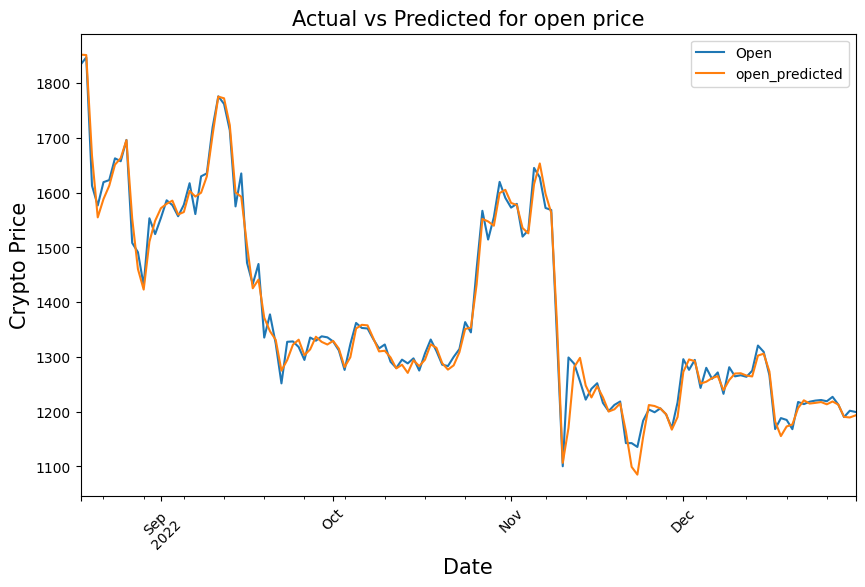

In [205]:
new_data[['Open','open_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Crypto Price',size=15)
plt.title('Actual vs Predicted for open price',size=15)
plt.show()

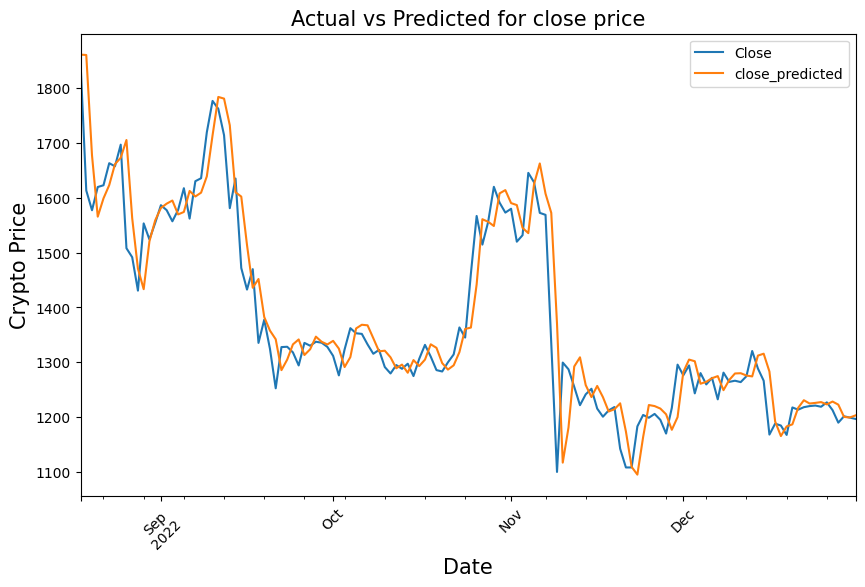

In [206]:
new_data[['Close','close_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Crypto Price',size=15)
plt.title('Actual vs Predicted for close price',size=15)
plt.show()

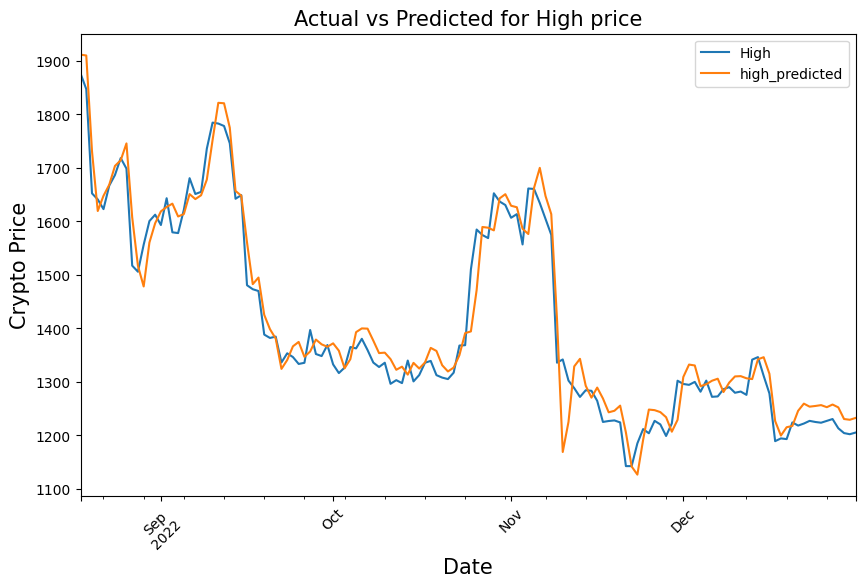

In [207]:
new_data[['High','high_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Crypto Price',size=15)
plt.title('Actual vs Predicted for High price',size=15)
plt.show()

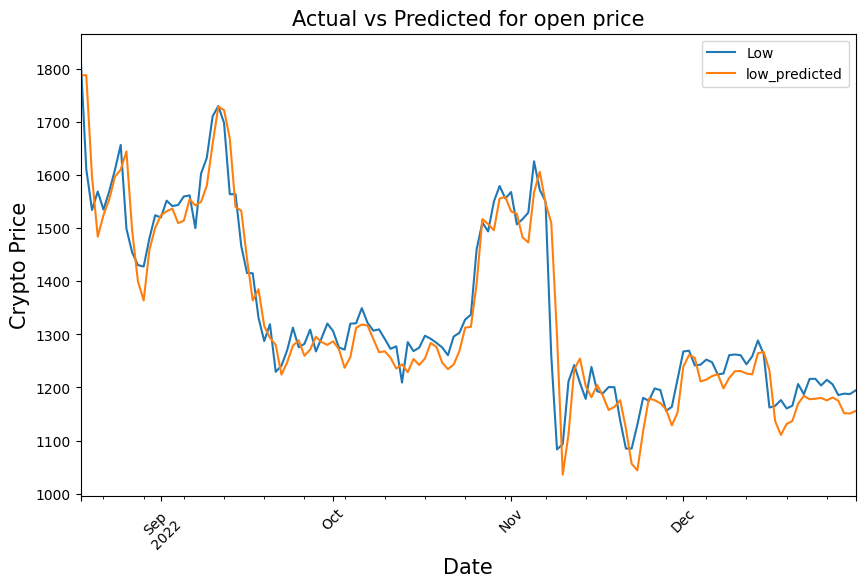

In [208]:
new_data[['Low', 'low_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Crypto Price',size=15)
plt.title('Actual vs Predicted for open price',size=15)
plt.show()

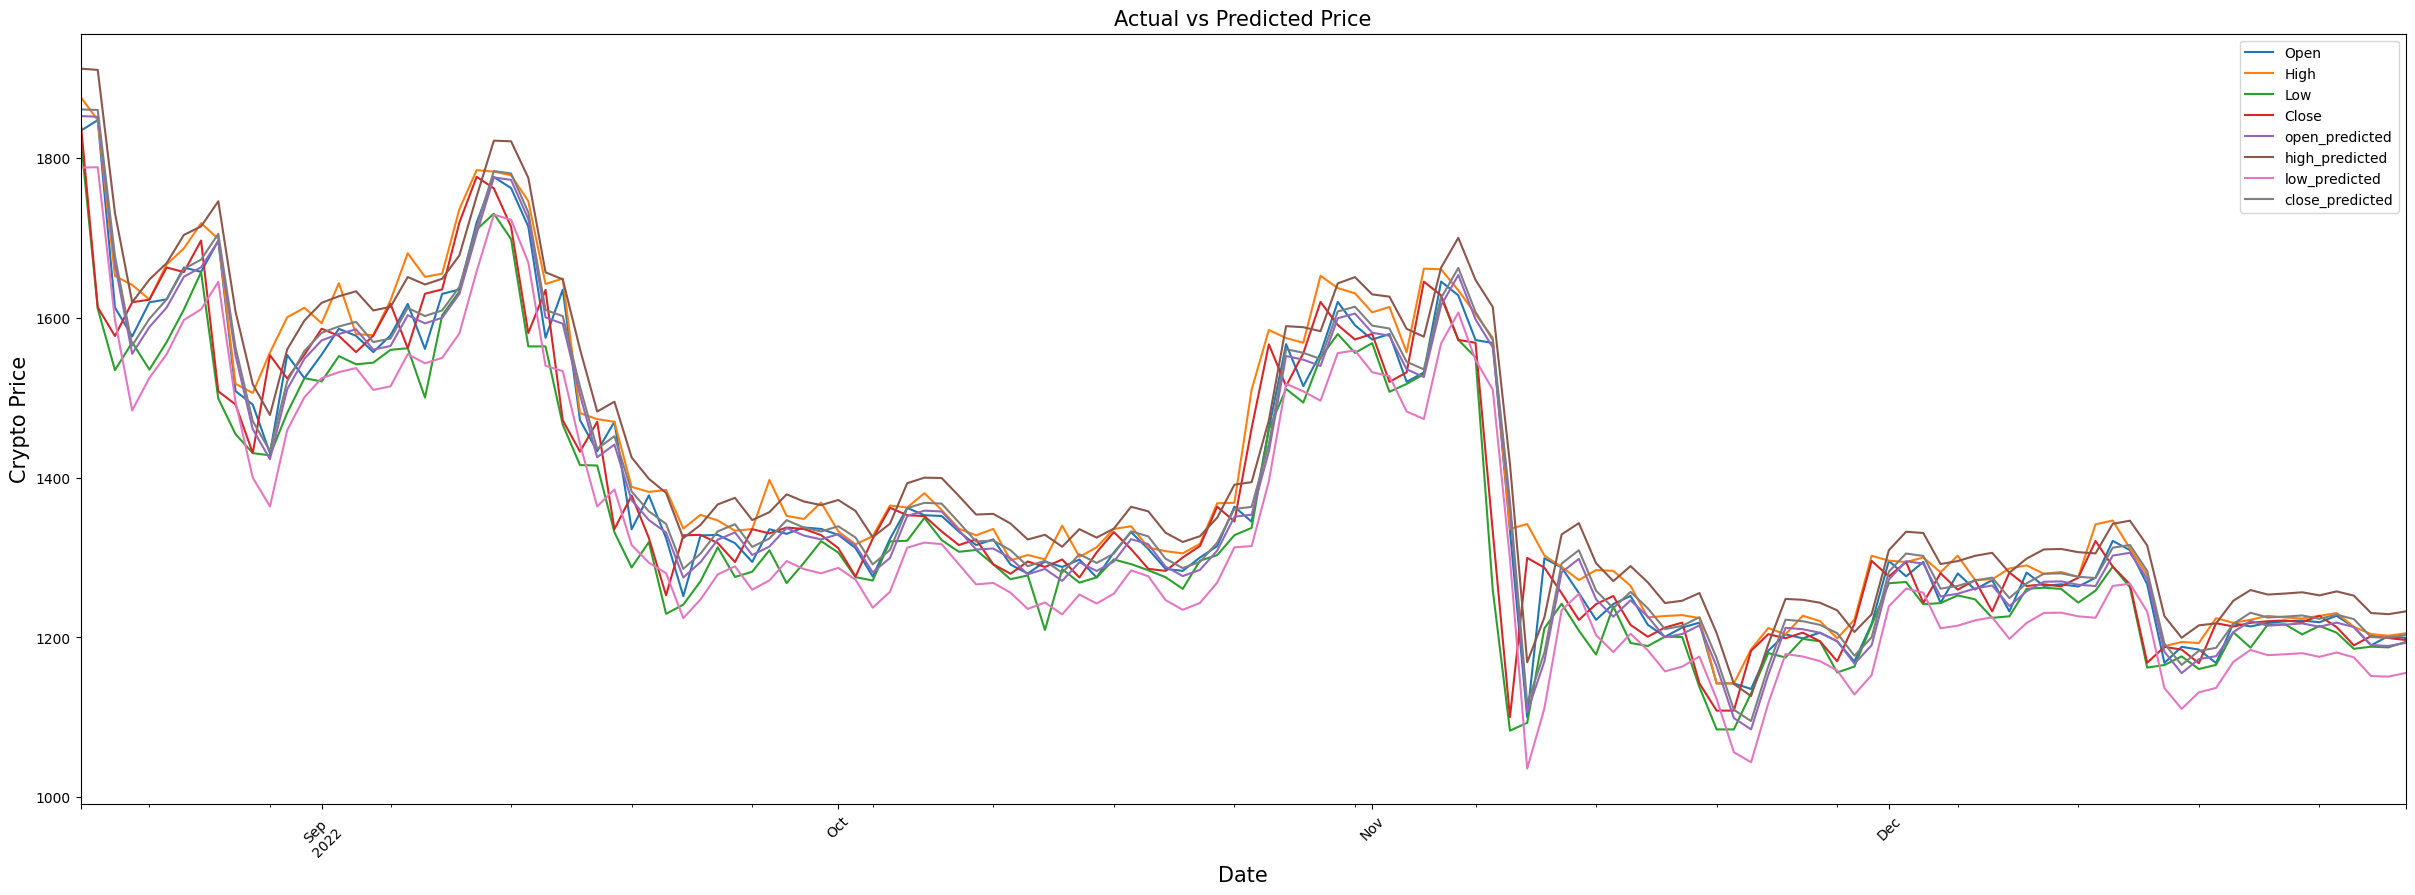

In [209]:
new_data[:].plot(figsize=(30,10))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Crypto Price',size=15)
plt.title('Actual vs Predicted Price',size=15)
plt.show()

In [210]:
new_data

,Open,High,Low,Close,open_predicted,high_predicted,low_predicted,close_predicted
Date,,,,,,,,
2022-08-18,1833.72,1876.38,1826.96,1847.01,1852.173340,1911.589966,1787.771362,1860.565918
2022-08-19,1847.10,1847.10,1611.34,1612.99,1851.381958,1909.977783,1788.244019,1859.870361
2022-08-20,1612.65,1652.22,1534.30,1577.00,1666.984863,1730.812256,1597.065063,1676.919189
2022-08-21,1576.54,1640.94,1569.05,1619.32,1554.813110,1619.263062,1483.980347,1565.304932
2022-08-22,1619.17,1622.78,1535.01,1622.51,1588.310791,1647.693848,1524.682983,1598.620117
...,...,...,...,...,...,...,...,...
2022-12-27,1226.99,1230.42,1205.90,1212.79,1218.472168,1257.529297,1181.108276,1228.412964
2022-12-28,1212.74,1213.13,1185.70,1189.99,1212.834473,1252.202393,1175.026245,1222.810547
2022-12-29,1190.01,1204.14,1188.36,1201.60,1190.400635,1230.462402,1151.559204,1200.454712


# Predicting upcoming Days



In [211]:
start_predict = new_data.index[-1]
end_predict = pd.to_datetime("today")
period = (start_predict - end_predict).days - 1
period

-244

In [212]:
# Creating a dataframe and adding N days to existing index

new_rows = pd.DataFrame(index=pd.date_range(start=start_predict,  end=end_predict, freq='D', inclusive='right'), columns=new_data.columns[:4])
new_pred_data = pd.concat([new_data.drop(columns=['open_predicted','high_predicted', 'low_predicted', 'close_predicted'], axis= 0), new_rows], axis=0)

In [213]:
new_rows

,Open,High,Low,Close
2023-01-01,NaN,NaN,NaN,NaN
2023-01-02,NaN,NaN,NaN,NaN
2023-01-03,NaN,NaN,NaN,NaN
2023-01-04,NaN,NaN,NaN,NaN
2023-01-05,NaN,NaN,NaN,NaN
...,...,...,...,...
2023-08-26,NaN,NaN,NaN,NaN
2023-08-27,NaN,NaN,NaN,NaN
2023-08-28,NaN,NaN,NaN,NaN
2023-08-29,NaN,NaN,NaN,NaN


In [214]:
#Get Latest Price

latest_date_start = start_predict.strftime("%d-%m-%Y")

latest_date_end = end_predict.strftime("%d-%m-%Y")

latest_scraper = CmcScraper(crypto, latest_date_start, latest_date_end)
latest_price =  latest_scraper.get_dataframe()

In [215]:
latest_price['Open'] = latest_price['Open'].apply(lambda x:round(x,2))
latest_price['High'] = latest_price['High'].apply(lambda x:round(x,2))
latest_price['Low'] = latest_price['Low'].apply(lambda x:round(x,2))
latest_price['Close'] = latest_price['Close'].apply(lambda x:round(x,2))

In [216]:
latest_price = latest_price[::-1]
latest_price = latest_price.reset_index()

In [217]:
latest_price = latest_price[['Date','Open','High','Low','Close']] # Extracting required columns
latest_price['Date'] = pd.to_datetime(latest_price['Date'])
latest_price.set_index('Date', drop=True, inplace=True) # Setting date column as index

In [218]:
latest_price

,Open,High,Low,Close
Date,,,,
2022-12-31,1199.36,1205.09,1194.20,1196.77
2023-01-01,1196.71,1203.48,1192.89,1200.96
2023-01-02,1201.10,1219.86,1195.22,1214.66
2023-01-03,1214.74,1219.10,1207.49,1214.78
2023-01-04,1214.72,1264.81,1213.17,1256.53
...,...,...,...,...
2023-08-25,1660.27,1671.97,1635.97,1652.94
2023-08-26,1652.93,1654.78,1643.71,1646.31
2023-08-27,1646.27,1659.27,1645.90,1657.51


In [219]:
new_pred_data

,Open,High,Low,Close
2022-08-18,1833.72,1876.38,1826.96,1847.01
2022-08-19,1847.10,1847.10,1611.34,1612.99
2022-08-20,1612.65,1652.22,1534.30,1577.00
2022-08-21,1576.54,1640.94,1569.05,1619.32
2022-08-22,1619.17,1622.78,1535.01,1622.51
...,...,...,...,...
2023-08-26,NaN,NaN,NaN,NaN
2023-08-27,NaN,NaN,NaN,NaN
2023-08-28,NaN,NaN,NaN,NaN
2023-08-29,NaN,NaN,NaN,NaN


In [220]:
upcoming_prediction = pd.DataFrame(columns=['Open','High','Low','Close'], index=new_pred_data.index)
upcoming_prediction.index=pd.to_datetime(upcoming_prediction.index)

In [221]:
test_seq[-1:]

array([[[0.23652299, 0.23238898, 0.24038366, 0.23559176],
        [0.23568991, 0.23318302, 0.23620659, 0.23656467],
        [0.23662712, 0.2342299 , 0.24244948, 0.23698527],
        [0.23706067, 0.23379318, 0.24252519, 0.23719557],
        [0.23728381, 0.23350273, 0.23979528, 0.23673036],
        [0.23680564, 0.23422364, 0.24209256, 0.23843188],
        [0.23852068, 0.23494454, 0.24026685, 0.2354197 ],
        [0.23549226, 0.23133165, 0.23589726, 0.23057641],
        [0.23066166, 0.22945311, 0.23647266, 0.23304267],
        [0.2331184 , 0.22901221, 0.23627798, 0.23253922]]])

In [222]:
currenct_seq = test_seq[-1:]

for i in range(period, 0):
  up_pred = model.predict(currenct_seq)
  upcoming_prediction.iloc[i] = up_pred
  currenct_seq = np.append(currenct_seq[0][1:],up_pred,axis=0)
  currenct_seq = currenct_seq.reshape(test_seq[-1:].shape)

1/1 [==============================] - 0s 26ms/step


In [223]:
upcoming_prediction[['Open','High','Low','Close']] = MMS.inverse_transform(upcoming_prediction[['Open','High','Low','Close']])

In [224]:
upcoming_prediction[start_predict:end_predict]

,Open,High,Low,Close
2022-12-31,1194.952623,1234.036472,1157.627307,1205.057905
2023-01-01,1195.995672,1234.954109,1158.832605,1206.087327
2023-01-02,1196.686387,1235.650823,1159.492464,1206.757450
2023-01-03,1197.221023,1236.263461,1159.898684,1207.272968
2023-01-04,1197.764914,1236.907548,1160.291197,1207.802515
...,...,...,...,...
2023-08-26,1644.237881,1694.933210,1591.610854,1653.365740
2023-08-27,1647.261993,1698.026564,1594.541263,1656.379016
2023-08-28,1650.304056,1701.138602,1597.489308,1659.410250
2023-08-29,1653.364769,1704.269466,1600.455263,1662.459722


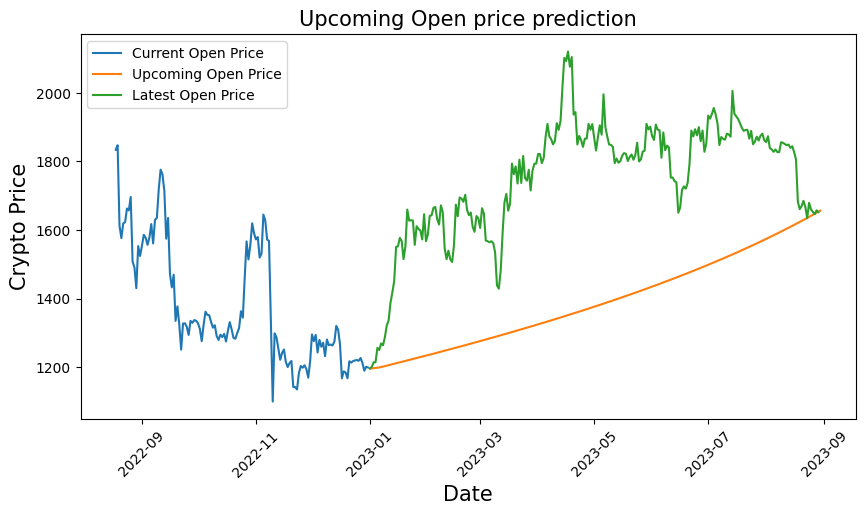

In [225]:
fig,ax=plt.subplots(figsize=(10,5))
ax.plot(new_pred_data.loc['2022-01-01':,'Open'],label='Current Open Price')
ax.plot(upcoming_prediction.loc['2023-01-01':,'Open'],label='Upcoming Open Price')
ax.plot(latest_price.loc['2023-01-01':,'Open'],label='Latest Open Price')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.set_xlabel('Date',size=15)
ax.set_ylabel('Crypto Price',size=15)
ax.set_title('Upcoming Open price prediction',size=15)
ax.legend()
fig.show()

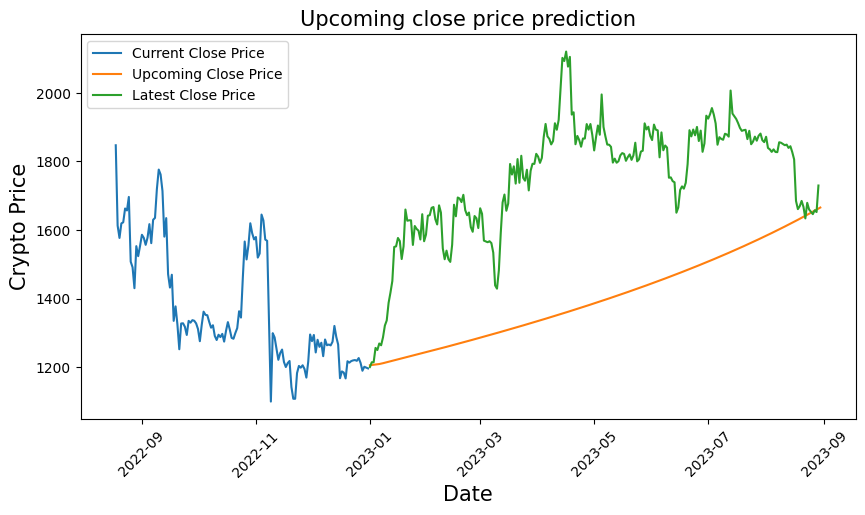

In [226]:
fig,ax=plt.subplots(figsize=(10,5))
ax.plot(new_pred_data.loc['2022-01-01':,'Close'],label='Current Close Price')
ax.plot(upcoming_prediction.loc['2023-01-01':,'Close'],label='Upcoming Close Price')
ax.plot(latest_price.loc['2023-01-01':,'Close'],label='Latest Close Price')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.set_xlabel('Date',size=15)
ax.set_ylabel('Crypto Price',size=15)
ax.set_title('Upcoming close price prediction',size=15)
ax.legend()
fig.show()

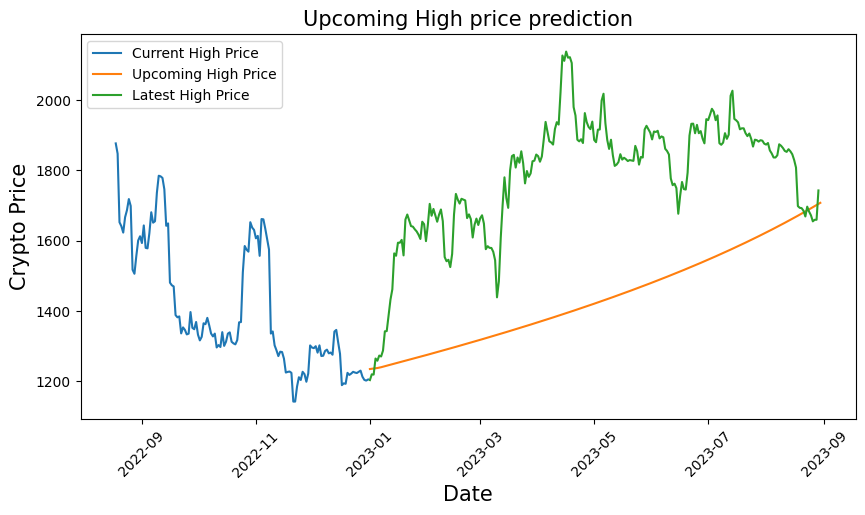

In [227]:
fig,ax=plt.subplots(figsize=(10,5))
ax.plot(new_pred_data.loc['2022-01-01':,'High'],label='Current High Price')
ax.plot(upcoming_prediction.loc['2023-01-01':,'High'],label='Upcoming High Price')
ax.plot(latest_price.loc['2023-01-01':,'High'],label='Latest High Price')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.set_xlabel('Date',size=15)
ax.set_ylabel('Crypto Price',size=15)
ax.set_title('Upcoming High price prediction',size=15)
ax.legend()
fig.show()

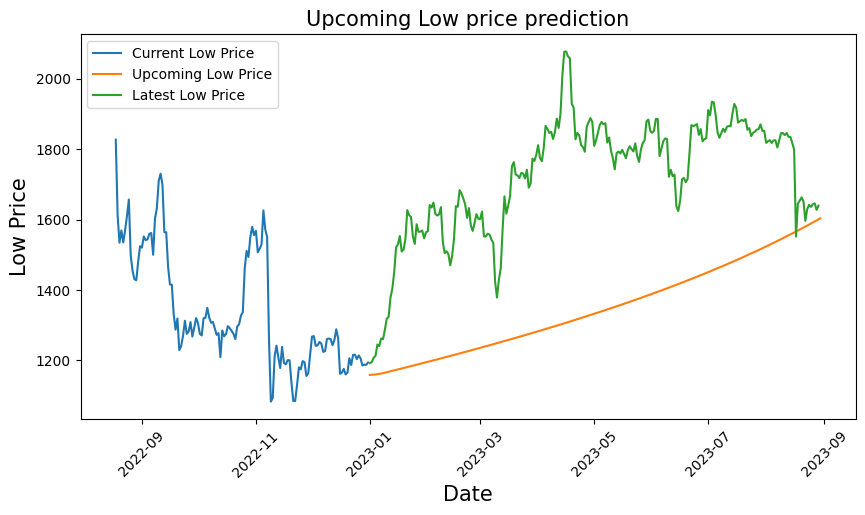

In [228]:
fig,ax=plt.subplots(figsize=(10,5))
ax.plot(new_pred_data.loc['2022-01-01':,'Low'],label='Current Low Price')
ax.plot(upcoming_prediction.loc['2023-01-01':,'Low'],label='Upcoming Low Price')
ax.plot(latest_price.loc['2023-01-01':,'Low'],label='Latest Low Price')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.set_xlabel('Date',size=15)
ax.set_ylabel('Low Price',size=15)
ax.set_title('Upcoming Low price prediction',size=15)
ax.legend()
fig.show()

In [229]:
import zipfile
import os

def zip_folder(folder_path, output_path):
    with zipfile.ZipFile(output_path, 'w', zipfile.ZIP_DEFLATED) as zipf:
        for root, _, files in os.walk(folder_path):
            for file in files:
                file_path = os.path.join(root, file)
                arcname = os.path.relpath(file_path, folder_path)
                zipf.write(file_path, arcname)

In [230]:
folder_to_compress = f'/content/{crypto}_epoch_{epoch}_model'
output_zip_path = f'/content/{crypto}_epoch_{epoch}_model.zip'

zip_folder(folder_to_compress, output_zip_path)
print(f'Folder "{folder_to_compress}" compressed to "{output_zip_path}"')

Folder "/content/ETH_epoch_75_model" compressed to "/content/ETH_epoch_75_model.zip"
